In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
from wordcloud import WordCloud, STOPWORDS 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
from sklearn.model_selection import train_test_split

## Make dataframes

In [7]:
def read_tsv(filepath):
    """Reads in a tsv file

    Args:
        filepath (string): filepath and file name of the 
            tsv file to be read into as a pandas dataframe
    Returns:
        Pandas DataFrame
    """    
    return pd.read_csv(filepath, sep = "\t")

In [10]:
def make_q_and_a_col(df):
    """
    Makes a column that concatenates the strings
    from the question and answer columns

    Args:
        df (Pandas DataFrame): 
    Returns:
        Pandas DataFrame with an additional column
    """    
    df['question_and_answer'] = df["question"] + df['answer']
    return df

#TODO: make another condition using "view assummptions" 
def make_q_difficulty_col(df):
    conditions = [((df['value']<=600) & (df['daily_double']=='no')), #easy
                ((df['daily_double']=='no') & ((df['value']==800) | (df['value']==1200))), #average
                ((df['daily_double']== 'yes') & (df['round'] == 1)), #average
                ((df['daily_double']=='no') & ((df['value']==1000) | (df['value']>=1600))), #hard
                ((df['daily_double']== 'yes') & (df['round'] == 2)), #hard
                (df['round'] == 3)] # final jeopardy, hard 


    difficulties = ['easy', 'average', 'average', 'hard', 'hard', 'hard']

    df['question_difficulty'] = np.select(conditions, difficulties)
    return df

#TODO: write docstring
def update_df_columns(df):
    """[summary]

    Args:
        df ([type]): [description]

    Returns:
        [type]: [description]
    """    
    df_new = make_q_and_a_col(df)
    df_new = make_q_difficulty_col(df_new)
    return df_new

In [186]:
jeopardy = read_tsv('../data/master_season1-35.tsv')
jeopardy_df = update_df_columns(jeopardy)
regular_episodes = jeopardy_df[jeopardy_df['notes']=='-']
special_tournament = jeopardy_df.drop(regular_episodes.index)
regular_episodes_sub = regular_episodes.sample(frac = 0.1, axis = 0, random_state = 123)



In [179]:
regular_episodes_sub

,round,value,daily_double,category,comments,answer,question,air_date,notes,question_and_answer,question_difficulty
120126,2,800,no,WHAT'S WRONG WITH YOU?,-,Underactivity of this butterfly-shaped gland s...,Thyroid gland,2001-02-23,-,Thyroid glandUnderactivity of this butterfly-s...,average
151920,2,2000,no,GEOMETRY,-,(Cheryl of the Clue Crew in front of a blackbo...,eccentric,2003-10-03,-,eccentric(Cheryl of the Clue Crew in front of ...,hard
149746,1,400,no,BIBLE PEOPLE MAGAZINE,(Alex: That sounds like fun!),Star Tracks says that scholars believe these s...,Magi/three wise men,2003-06-24,-,Magi/three wise menStar Tracks says that schol...,easy
146280,1,800,no,ODE TO ENGLAND,-,Headquarters was needed for Peel's new police ...,Scotland Yard,2003-04-01,-,Scotland YardHeadquarters was needed for Peel'...,average
151002,2,2000,no,"\""C"" IN SCIENCE",-,"In order to duplicate itself in cell division,...",chromosomes,2003-09-10,-,chromosomesIn order to duplicate itself in cel...,hard
...,...,...,...,...,...,...,...,...,...,...,...
258907,2,400,yes,BALLET,-,A young prince is saved by a magic feather in ...,The Firebird,2012-03-21,-,The FirebirdA young prince is saved by a magic...,hard
28121,1,300,no,HATS,-,A ballad about U.S. soldiers with these hats w...,green berets,1989-10-11,-,green beretsA ballad about U.S. soldiers with ...,easy
318757,1,600,no,ANNUAL EVENTS,-,The inedible one is celebrated March 14; the e...,pie,2017-02-01,-,pieThe inedible one is celebrated March 14; th...,easy
9784,2,800,no,NATIVE AMER. WOMEN,-,"In 1958, this Cherokee Lady had ""That Old Blac...",Keely Smith,1987-04-24,-,"Keely SmithIn 1958, this Cherokee Lady had ""Th...",average


In [180]:
def make_train_test_sets(df, x_cols, y_col, test_size = .25, random_state = 123):
    X = df[x_cols]
    y = df[y_col]
    X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

make_train_test_sets(jeopardy, 'question_and_answer', 'question_difficulty')

(325110    Edward AlbeeIn his Pulitzer Prize-winning play...
 8800      hard-boiledDescribes Mike Hammer or a 30-minut...
 241801    intertwineFrom the Old English for "twisted th...
 1127      the (common) loonThis "crazy" North American d...
 210976    the Beastie BoysDad thinks he's an O.G. becaus...
                                 ...                        
 119879    \"Don't Worry, Be Happy\"Emily, sobbing, tells...
 259178    foolChiffon margarine scolded, "It's not nice ...
 131932    Kurt WarnerThis Rams quarterback was selected ...
 146867    MissouriThis state's southwest corner is at So...
 121958    DenmarkThe Faroe Islands are a self-governing ...
 Name: question_and_answer, Length: 234259, dtype: object,
 335254    dromedaryThe name of this camel breed comes fr...
 165966    Judy & PunchAt last, give the lady top billing...
 122255    HousewarmingIt's the type of party you throw t...
 48411     (Charles) SchwabThis discount brokerage house ...
 321239      Lady Antebell

## Cleaning function without stemming or lemmatizing (its tokenized)

In [159]:
def clean_text(df, col):
    '''
    using a pre-made function 
    returns a list of the tokenized and stripped of stopwords 
    '''
    text = ' '.join(df[col])
    tokens = word_tokenize(text)
    # converts the tokens to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalnum()]
    
    # filter out stop words
    if col == 'notes':
        #TODO: add another set of stopwords for the notes
        remove_words = {'final', 'quarterfinal', 'game', 'jeopardy!', 'semifinal', 'round', 'tournament', 'week', 'reunion', 'ultimate', 'night', 'jeopardy', 'night', 'games'}
        stopwords_set = (set(stopwords.words('english'))).union(remove_words)
    else:
        stopwords_set = set(stopwords.words('english'))
    words = [w for w in words if not w in stopwords_set]
    return words


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [195]:
import re

def clean_columns(df, cols):
    """[summary]

    Args:
        df ([type]): [description]
        cols (list of str): list of columns to be cleaned, as strings

    Returns:
        Pandas DataFrame: with removed punctuation
    """
    for col in cols:
        p = re.compile(r'[^\w\s]+')
        df[col] = [p.sub('', x) for x in df[col].tolist()]
        df[col] = df[col].str.lower()
    return df

clean_columns(jeopardy_df,  ['question_and_answer', 'answer'])


,round,value,daily_double,category,comments,answer,question,air_date,notes,question_and_answer,question_difficulty
0,1,100,no,lakes rivers,-,river mentioned most often in the bible,the Jordan,1984-09-10,-,the jordanriver mentioned most often in the bible,easy
1,1,200,no,lakes rivers,-,scottish word for lake,loch,1984-09-10,-,lochscottish word for lake,easy
2,1,400,no,lakes rivers,-,american river only 33 miles shorter than the ...,the Missouri,1984-09-10,-,the missouriamerican river only 33 miles short...,easy
3,1,500,no,lakes rivers,-,worlds largest lake nearly 5 times as big as s...,the Caspian Sea,1984-09-10,-,the caspian seaworlds largest lake nearly 5 ti...,easy
4,1,100,no,inventions,-,marconis wonderful wireless,the radio,1984-09-10,-,the radiomarconis wonderful wireless,easy
...,...,...,...,...,...,...,...,...,...,...,...
349636,2,400,no,make it snappy,-,as well as photosharing on this app you can wa...,Snapchat,2019-07-26,-,snapchatas well as photosharing on this app yo...,easy
349637,2,800,no,make it snappy,-,genus antirrhinum these flowers snap closed af...,snapdragons,2019-07-26,-,snapdragonsgenus antirrhinum these flowers sna...,average
349638,2,1600,no,make it snappy,-,this hyphenated tool company owns brands like ...,Snap-On,2019-07-26,-,snaponthis hyphenated tool company owns brands...,hard
349639,2,2000,no,make it snappy,-,in 2019 meteorologist daryl ritchison at ndsu ...,North Dakota State University,2019-07-26,-,north dakota state universityin 2019 meteorolo...,hard


In [158]:
regular_episodes_sub['category'].apply(word_tokenize)
regular_episodes_sub

,round,value,daily_double,category,comments,answer,question,air_date,notes,question_and_answer,question_difficulty
120126,2,800,no,WHAT'S WRONG WITH YOU?,-,Underactivity of this butterfly-shaped gland s...,Thyroid gland,2001-02-23,-,Thyroid glandUnderactivity of this butterfly-s...,average
151920,2,2000,no,GEOMETRY,-,(Cheryl of the Clue Crew in front of a blackbo...,eccentric,2003-10-03,-,eccentric(Cheryl of the Clue Crew in front of ...,hard
149746,1,400,no,BIBLE PEOPLE MAGAZINE,(Alex: That sounds like fun!),Star Tracks says that scholars believe these s...,Magi/three wise men,2003-06-24,-,Magi/three wise menStar Tracks says that schol...,easy
146280,1,800,no,ODE TO ENGLAND,-,Headquarters was needed for Peel's new police ...,Scotland Yard,2003-04-01,-,Scotland YardHeadquarters was needed for Peel'...,average
151002,2,2000,no,"\""C"" IN SCIENCE",-,"In order to duplicate itself in cell division,...",chromosomes,2003-09-10,-,chromosomesIn order to duplicate itself in cel...,hard
...,...,...,...,...,...,...,...,...,...,...,...
258907,2,400,yes,BALLET,-,A young prince is saved by a magic feather in ...,The Firebird,2012-03-21,-,The FirebirdA young prince is saved by a magic...,hard
28121,1,300,no,HATS,-,A ballad about U.S. soldiers with these hats w...,green berets,1989-10-11,-,green beretsA ballad about U.S. soldiers with ...,easy
318757,1,600,no,ANNUAL EVENTS,-,The inedible one is celebrated March 14; the e...,pie,2017-02-01,-,pieThe inedible one is celebrated March 14; th...,easy
9784,2,800,no,NATIVE AMER. WOMEN,-,"In 1958, this Cherokee Lady had ""That Old Blac...",Keely Smith,1987-04-24,-,"Keely SmithIn 1958, this Cherokee Lady had ""Th...",average


## Make wordcloud from cleaning function without stemming and lemamtizing

In [14]:
import matplotlib.pyplot as plt

def make_word_cloud(df, col, color, save = False):

    #generate word list
    word_lst = clean_columns(df, col)
    words = ' '.join(word_lst)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color =None, mode = 'RGBA', 
                colormap = color,
                collocations=False,
                min_font_size = 10).generate(words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None, dpi = 140) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    if save:
        plt.savefig(f'../images/eda_images/{col}_wordcloud.png')
    else:
        plt.show()

In [136]:
# list(regular_episodes['question_difficulty'])

### get wordcount according to question difficulty

In [106]:
# question_str = ' '.join(regular_episodes['question'])
# answer_str = ' '.join(regular_episodes['answer'])

# def clean_cols(text):
#     '''
#     using a pre-made function 
#     returns a list of the tokenized and stripped of stopwords 
#     '''
#     tokens = word_tokenize(text)
#     # converts the tokens to lower case
#     tokens = [w.lower() for w in tokens]
#     # remove punctuation from each word
#     table = str.maketrans('', '', string.punctuation)
#     stripped = [w.translate(table) for w in tokens]

#     words = [word for word in stripped if word.isalnum()]
    
# #     # filter out stop words
# #     if col == 'notes':
# #         #TODO: add another set of stopwords for the notes
# #         remove_words = {'final', 'quarterfinal', 'game', 'jeopardy!', 'semifinal', 'round', 'tournament', 'week', 'reunion', 'ultimate', 'night', 'jeopardy', 'night', 'games'}
# #         stopwords_set = (set(stopwords.words('english'))).union(remove_words)
# #     else:
#     stopwords_set = set(stopwords.words('english'))
#     words = [w for w in words if not w in stopwords_set]
#     return words

In [138]:
#handle how i got the wordcount 
ans_total_words = [len(x.split()) for x in regular_episodes['answer'].tolist()]
w_total_words = [len(x.split()) for x in regular_episodes['question'].tolist()]

data = {'question difficulty': list(regular_episodes['question_difficulty']), 
        'answer word count': ans_total_words, 
        'question word count': w_total_words}

df = pd.DataFrame(data, columns = ['question difficulty', 'answer word count', 'question word count'])
avgs = df.groupby('question difficulty').mean().sort_values('answer word count').round(2)
maxes = df.groupby('question difficulty').max().sort_values('answer word count').round(2)

avgs

,answer word count,question word count
question difficulty,,
easy,13.82,1.88
average,14.30,1.91
hard,14.50,1.97


In [139]:
maxes

,answer word count,question word count
question difficulty,,
average,52,16
easy,52,18
hard,52,25


In [118]:
len(regular_episodes['answer'][5].split())
#should be ok

9

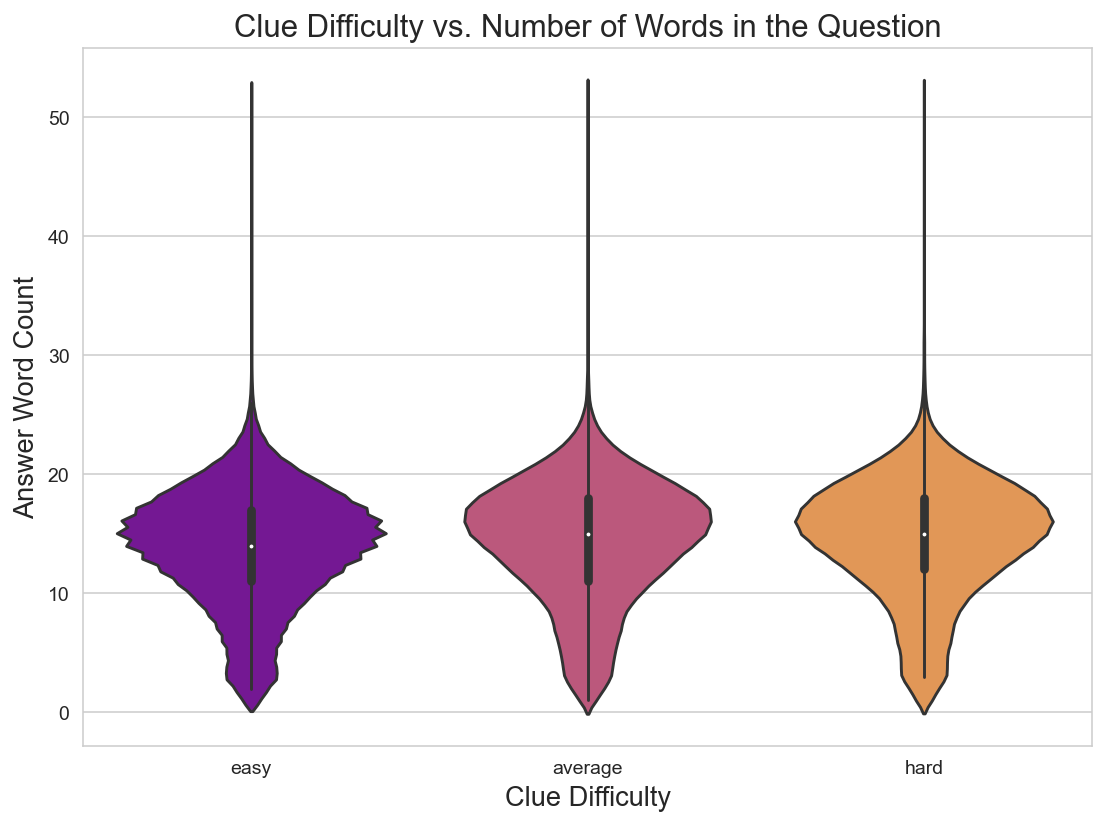

In [135]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (8, 6), dpi = 140)
ax = sns.violinplot(x = 'question difficulty', y = 'answer word count', data = df, palette = 'plasma')
ax.set_ylabel('Answer Word Count', fontsize = 14)
ax.set_xlabel('Clue Difficulty', fontsize = 14)
ax.set_title("Clue Difficulty vs. Number of Words in the Question", fontsize = 16)
plt.tight_layout()

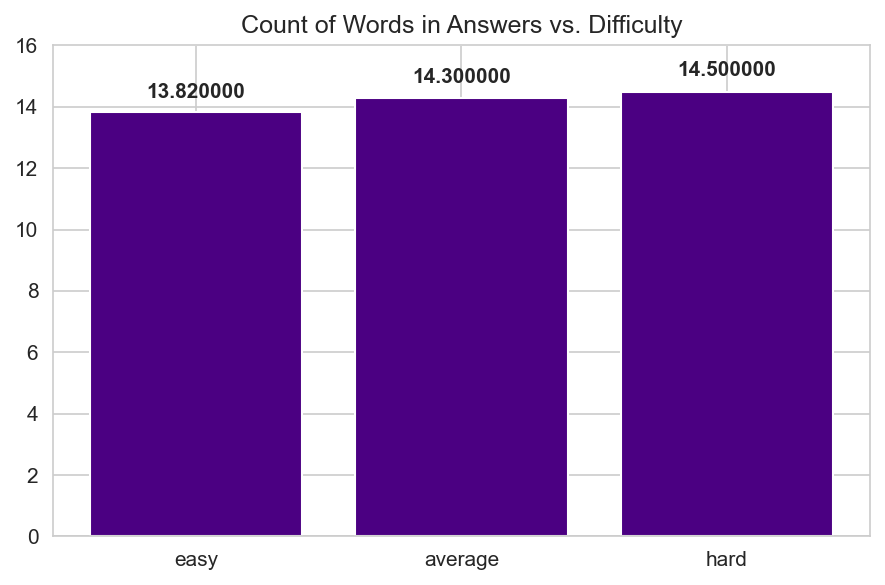

In [83]:


fig, ax = plt.subplots(1, 1, dpi = 150)

rects1 = ax.bar(avgs.index, avgs['answer word count'], color = 'indigo')
ax.set_title('Count of Words in Answers vs. Difficulty')
plt.ylim(0, 16)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.025*height,
                '%f' % float(height),
        ha='center', va='bottom', fontweight = 'bold')
        
autolabel(rects1)
plt.tight_layout()


In [89]:
#TODO: turn this into a function 
def find_avg_wordcounts(df, cols):
    pass
    for column in cols:
        total_words_ = [len(x.split()) for x in df[column].tolist()]
            #keep going
    return None
        
    

2


In [ ]:
jeopardy['notes'].str.contains('kids')

# Other Functions 

## Clean the text step-by-step
- remove punctuation
- remove stopwords
- lowercase 
- tokenize 
- lemmatize
## The function below aren't used

In [257]:
# Clean the text individually
def make_text(df, col):
    return df[col]

def lowercase(text):
    return ' '.join(text).lower()

def tokenize(text):
#     text = lowercase(df, col)
    tokenized = [word_tokenize(content) for content in text]
    return tokenized

#TODO: fix up this function 
def remove_punc(df, col):
    """
    removes punctuation from a column of text
    Args:
        df (Pandas dataFrame): The dataframe in use
        col (str): the column name to turn into a string
    Returns:
        [type]: [description]
    """        
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in ' '.join(tokenize(df, col))]
    return stripped

def remove_stopwords(text):
#     docs = tokenize(df, col)
#     text = lowercase(df, col)
    stopwords_set = set(stopwords.words('english'))
    return [[word for word in text if word not in stopwords_set] for word in text]

make_text(jeopardy, 'category')

pandas.core.series.Series

## clean_columns + wordclouds WITH stemming and lemmatizing

In [164]:
def clean_columns(df, col, stem = None):
    """
        cleans the columns by converting to a string, 
    lowercasing, removing stopwords, and tokenizing all in one 

    Args:
        df (pandas DataFrame): the DataFrame whose columns 
                will be turned to one string
        col (string): The column name in question
        stem (string), (optional):
                "snowball" for snowball stemmer
                "porter" for porter stemmer. 
                Defaults to None.

    Returns:
        list: a list of words as strings
    """
    text = stringify(df, col)
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # lemmatize the words 
    wordnet = WordNetLemmatizer()
    lemmatized = [wordnet.lemmatize(word) for word in stripped]
    
    #stem words, depending on the stemmer chosen as a parameter
    if stem == 'snowball':
        snowball = SnowballStemmer('english')
        stemmed = [snowball.stem(word) for word in lemmatized]
        # remove remaining tokens that are not alphabetic from stemmed
        words = [word for word in stemmed if word.isalpha()]
    elif stem == 'porter':
        porter = PorterStemmer()
        stemmed = [porter.stem(word) for word in lemmatized]
        # remove remaining tokens that are not alphabetic from stemmed
        words = [word for word in stemmed if word.isalpha()]
    elif stem == None:
        pass
        #skip stemming
        # remove remaining tokens that are not alphabetic from lemmatized
    else:
        words = [word for word in lemmatized if word.isalpha()]
    
    # filter out stop words
    if col == 'notes':
        #TODO: add another set of stopwords for the notes
        remove_words = {'final', 'quarterfinal', 'game', 'jeopardy!', 'semifinal', 'round', 'tournament', 'week', 'reunion', 'ultimate', 'night', 'jeopardy', 'night', 'games'}
        stopwords_set = (set(stopwords.words('english'))).union(remove_words)
    else:
        stopwords_set = set(stopwords.words('english'))
    words = [w for w in words if not w in stopwords_set]
    return words

In [165]:
def make_word_cloud(df, col, color, stem = None, save = False):
    """makes a word cloud of the words per column

    Args:
        df (pandas DataFrame): the DataFrame whose columns 
                will be turned to one string
        col (string): the string in question 
        color (string): the colormap preset to use
        save (bool, optional): Whether to save the figure or just show
                will save the figure as a .png, False will show the figure
                Defaults to False.
    """    
    #generate word list
    word_lst = clean_columns(df, col, stem = None) # can also get the words from the text vectorizer above
    words = ' '.join(word_lst)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color =None, mode = 'RGBA', 
                colormap = color,
                collocations=False,
                min_font_size = 10).generate(words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    if save:
        plt.savefig(f'../images/{col}_wordcloud.png')
    else:
        plt.show()
        
# make_word_cloud(jeopardy, 'category', stem = None, color = 'plasma', save = True)
# make_word_cloud(jeopardy, 'question', stem = None, color = 'Blues_r', save = True)
# make_word_cloud(jeopardy_subtrain, 'answer', stem = None, color = 'cividis_r', save = True)

## Wordcloud Colors

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'